# Jiahe Xu jxu109@jh.edu

## part A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [2]:
#np.random.seed(0)

In [3]:
n = 1000
m = 2000
T = 100

A = np.random.normal(0,1,size = (m,n))
b = np.random.normal(0,1,size = m)

In [4]:
np.mean(A)

-0.0009905449825706226

In [5]:
np.std(A)

0.9995505461627032

In [6]:
np.mean(b)

-0.008922802414592368

In [7]:
np.std(b)

0.9634205691430117

In [8]:
ATA = A.T.dot(A)
eigenvalue, eigenvector = np.linalg.eig(ATA)
lambda_max = np.max(eigenvalue)
lambda_min = np.min(eigenvalue)
print("Lipschitz gradient constant is: ",lambda_max)
print("Strong convexity constant is: ",lambda_min)

Lipschitz gradient constant is:  5845.625099032282
Strong convexity constant is:  170.45927879534872


In [9]:
# gradient descent
def get_gradient(x):
    gradient = np.subtract(np.matmul(ATA,x),np.matmul(A.T,b))
    #gradient = np.matmul(ATA,x) - np.matmul(A.T,b)
    return gradient

## part B

In [10]:
step_size=1/lambda_max
log_1 = []
max_iters = T
x_k = np.zeros(n)

#kn1 means k+1
x_kn1 = np.zeros(n)

In [11]:
for i in range(1,T+1):
    x_k = x_kn1
    gradient = get_gradient(x_k)
    log_1.append( np.linalg.norm(gradient,2) )
    x_kn1 = x_k - step_size*gradient
    print("iteration: ", i, "\nGradient L2-norm is: ",log_1[-1] ,'\n')

iteration:  1 
Gradient L2-norm is:  1335.695336917187 

iteration:  2 
Gradient L2-norm is:  736.3896843156532 

iteration:  3 
Gradient L2-norm is:  522.4088067040001 

iteration:  4 
Gradient L2-norm is:  406.8534883235798 

iteration:  5 
Gradient L2-norm is:  333.8066454886917 

iteration:  6 
Gradient L2-norm is:  283.23036979103995 

iteration:  7 
Gradient L2-norm is:  245.95042670072505 

iteration:  8 
Gradient L2-norm is:  217.17316256130817 

iteration:  9 
Gradient L2-norm is:  194.1635545513441 

iteration:  10 
Gradient L2-norm is:  175.25516140602414 

iteration:  11 
Gradient L2-norm is:  159.37775867563445 

iteration:  12 
Gradient L2-norm is:  145.8132511070683 

iteration:  13 
Gradient L2-norm is:  134.06157844408858 

iteration:  14 
Gradient L2-norm is:  123.76324701866133 

iteration:  15 
Gradient L2-norm is:  114.6526025507339 

iteration:  16 
Gradient L2-norm is:  106.52856430887051 

iteration:  17 
Gradient L2-norm is:  99.23568091377943 

iteration:  18 

## part C

In [12]:
#Accelerated gradient method

log_2 = []
x_k = np.zeros(n)
x_kn1=np.zeros(n)

lambda_k = 0
# kn1 means k+1 
lambda_kn1 = 1

y_k = x_k
y_kn1 = y_k

step_size=1/lambda_max

In [13]:
for i in range(1,T+1):
    y_kn1 = x_k - step_size * get_gradient(x_k)
    x_kn1 = y_kn1 +(((lambda_k)-1)/lambda_kn1)*(y_kn1 - y_k)
    
    y_k = y_kn1
    x_k = x_kn1
    
    temp = lambda_kn1
    lambda_kn1 =(1+np.sqrt(1+4*lambda_k**2))/2
    lambda_k = temp
    log_2.append(np.linalg.norm(get_gradient(x_k),2))
    print("iteration", i, "\nGradient norm is: ",log_2[-1] ,'\n')

iteration 1 
Gradient norm is:  1335.695336917187 

iteration 2 
Gradient norm is:  736.3896843156532 

iteration 3 
Gradient norm is:  522.4088067040001 

iteration 4 
Gradient norm is:  367.7251713766368 

iteration 5 
Gradient norm is:  284.150229973825 

iteration 6 
Gradient norm is:  219.13022920856295 

iteration 7 
Gradient norm is:  177.58298311813792 

iteration 8 
Gradient norm is:  142.7021371565929 

iteration 9 
Gradient norm is:  117.63860003792188 

iteration 10 
Gradient norm is:  95.58607659289021 

iteration 11 
Gradient norm is:  78.7732505910974 

iteration 12 
Gradient norm is:  63.80057037586474 

iteration 13 
Gradient norm is:  52.15244287947384 

iteration 14 
Gradient norm is:  41.904529683369375 

iteration 15 
Gradient norm is:  33.970671320043756 

iteration 16 
Gradient norm is:  27.16656995794734 

iteration 17 
Gradient norm is:  21.97208204588633 

iteration 18 
Gradient norm is:  17.630697770232775 

iteration 19 
Gradient norm is:  14.35641261708213 

## part D

In [14]:
x_k = np.zeros(n)
x_kn1 = np.zeros(n)
y_k=x_k
y_kn1=y_k
lambda_k = 0
lambda_kn1 = 1
step_size=1/lambda_max
log_3=[]

In [15]:
for i in range(1,T+1):
    if(i%25 == 1):
        lambda_k = 0
        lambda_kn1 = 1
        print("restarted !!!!!!!!!!!!!!!!!!!!!!!!!!!!!") 
        
    y_kn1 = x_k - step_size * get_gradient(x_k)
    x_kn1 = y_kn1 +((lambda_k-1)/lambda_kn1)*(y_kn1 - y_k)
        
    y_k = y_kn1
    x_k = x_kn1   
    
    temp = lambda_kn1
    lambda_kn1 =(1+np.sqrt(1+4*lambda_k**2))/2
    lambda_k = temp
    log_3.append(np.linalg.norm(get_gradient(x_k),2))
    print("iteration: ", i,"\nGradient L2-norm is: ",log_3[-1] ,'\n') 
    

restarted !!!!!!!!!!!!!!!!!!!!!!!!!!!!!
iteration:  1 
Gradient L2-norm is:  1335.695336917187 

iteration:  2 
Gradient L2-norm is:  736.3896843156532 

iteration:  3 
Gradient L2-norm is:  522.4088067040001 

iteration:  4 
Gradient L2-norm is:  367.7251713766368 

iteration:  5 
Gradient L2-norm is:  284.150229973825 

iteration:  6 
Gradient L2-norm is:  219.13022920856295 

iteration:  7 
Gradient L2-norm is:  177.58298311813792 

iteration:  8 
Gradient L2-norm is:  142.7021371565929 

iteration:  9 
Gradient L2-norm is:  117.63860003792188 

iteration:  10 
Gradient L2-norm is:  95.58607659289021 

iteration:  11 
Gradient L2-norm is:  78.7732505910974 

iteration:  12 
Gradient L2-norm is:  63.80057037586474 

iteration:  13 
Gradient L2-norm is:  52.15244287947384 

iteration:  14 
Gradient L2-norm is:  41.904529683369375 

iteration:  15 
Gradient L2-norm is:  33.970671320043756 

iteration:  16 
Gradient L2-norm is:  27.16656995794734 

iteration:  17 
Gradient L2-norm is:  

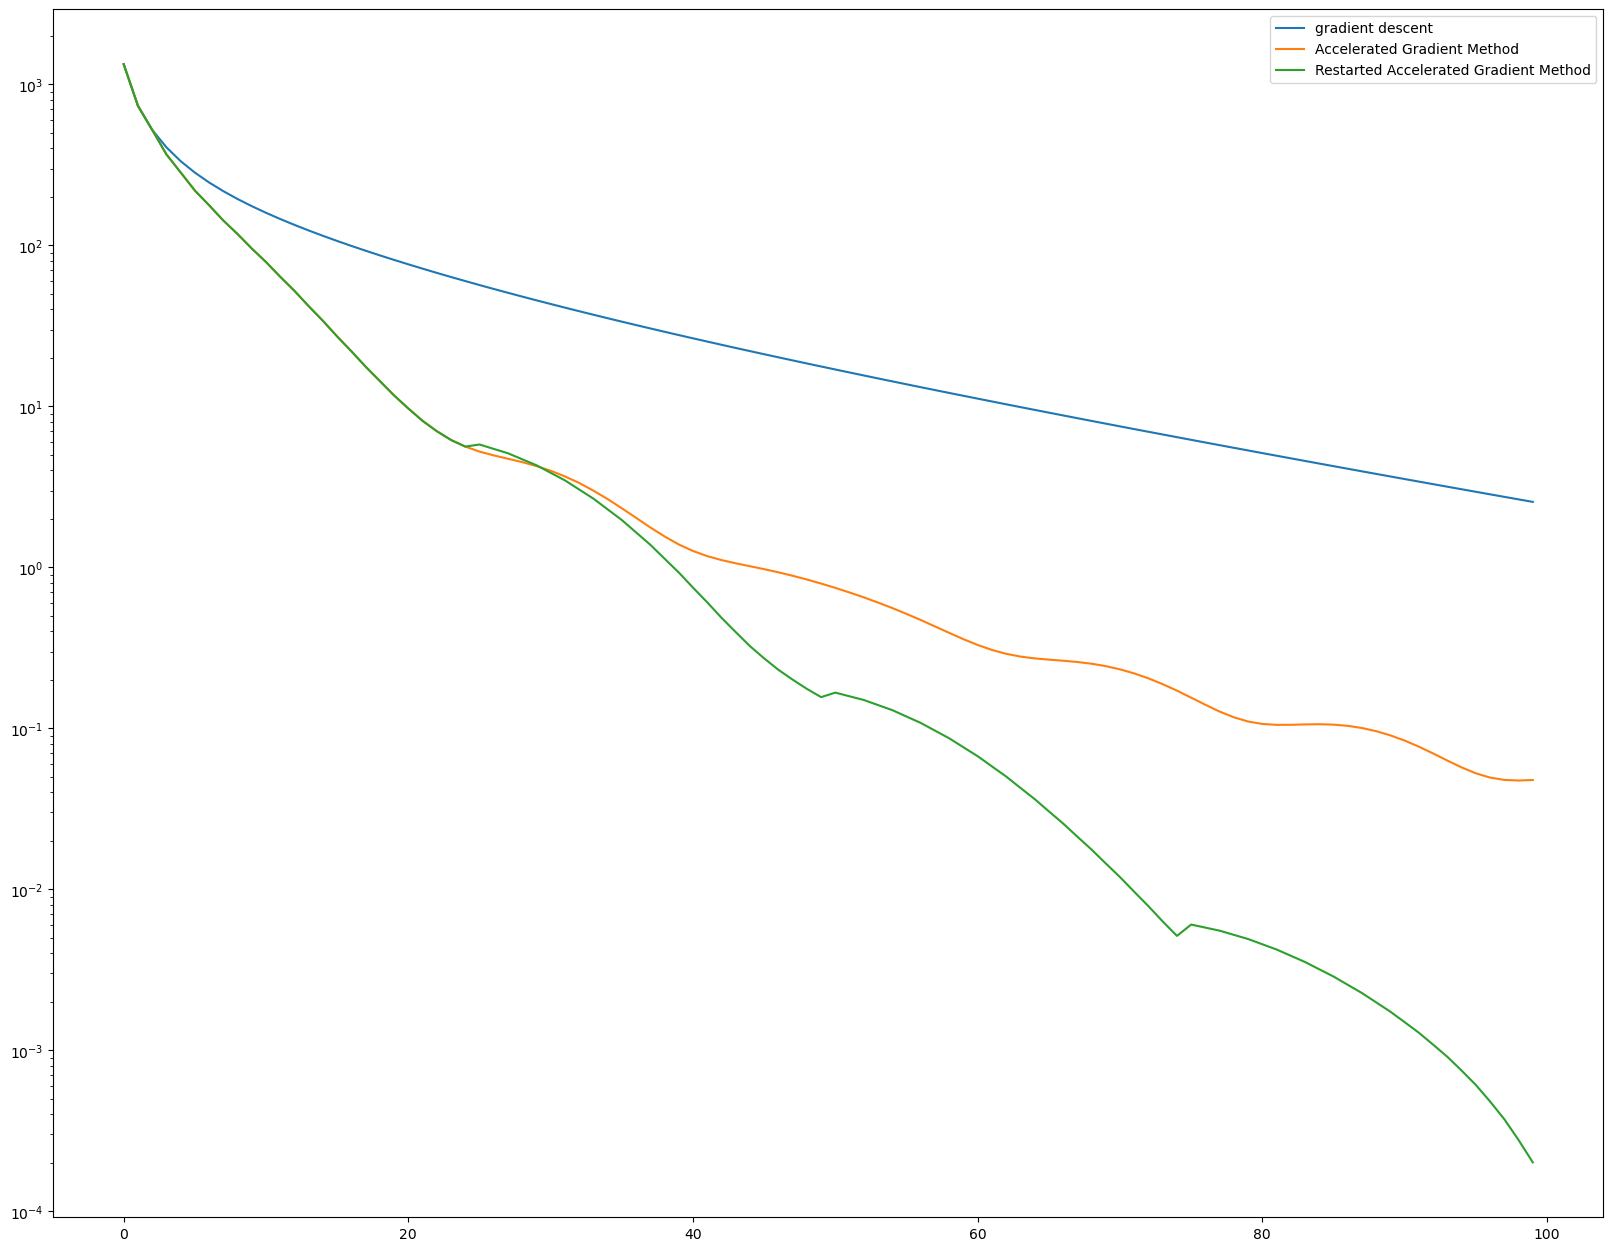

In [16]:
from matplotlib.pyplot import figure
figure(figsize=(20, 16), dpi=100)

plt.yscale("log")
plt.plot(range(T),log_1,label='gradient descent')
plt.plot(range(T),log_2,label='Accelerated Gradient Method')
plt.plot(range(T),log_3,label='Restarted Accelerated Gradient Method')
plt.legend(loc="upper right")
plt.show()